In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline


with open("SplitFiles/Output/EMB_faster*.txt") as getParam:
    
    line = getParam.readline()
    
line = line.split()

numberPairs = int(line[0])
emb_dimension = int(line[1])
emb_dimension += 1

file = pd.read_csv("SplitFiles/Output/EMB_faster*.txt",names=[str(i) for i in range(emb_dimension)],delimiter=' ', skiprows=1)

features = [str(i) for i in range(1,emb_dimension)]


x = file.loc[:, features].values
y = file.loc[:,['0']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, file[['0']]], axis=1)




In [3]:

x_coord = finalDf['principal component 1']
y_coord = finalDf['principal component 2']
label = finalDf['0']


def calculateDistanceWith(k):
    
    p1 = x_coord[k]
    p2 = y_coord[k]
    
    return (np.sqrt(np.square(x_coord-p1)+(np.square(y_coord-p2))))       

def findNearestNeighbor(k,t,nPairs):
    
    relativeDistance = calculateDistanceWith(k)
    
    dtype = [('distance',float),('label','U50')]
    
    distances = []
    
    testFile = open("testfile.txt","a")
    
    for i,d in enumerate(relativeDistance):
        distances.append((d, label[i]))
        #distances[i] = (d,label[i])
        testFile.write("\n"+str(distances[i]))
    
    testFile.close()
    
    temp_array = np.array(distances, dtype=dtype)
    ordered_array = np.sort(temp_array, order='distance')
    
    return ordered_array[:t+1]
    
    #print(np.sort(relativeDistance))

In [18]:
list_label = [i for i in label]

print(list_label[0], list_label.index("['products',\'group\']"))
print(list_label.index("['dishwasher','freezer']"))

random = 79805
top = 10
nearestNeighbors = findNearestNeighbor(random,top,numberPairs)

print("\n Top ",top, " Nearest neighbors of ",label[random])
for items in nearestNeighbors:
    #print(items[0], str(items[1],'utf-8'))
    print(items)
    


['products','group'] 0
79805

 Top  10  Nearest neighbors of  ['dishwasher','freezer']
(0., "['dishwasher','freezer']")
(0.05076928, "['%','wales']")
(0.05399959, "['health','conference']")
(0.0768348, "['board','links']")
(0.07790822, "['browser','controls']")
(0.08784267, "['site','scientific']")
(0.08832778, "['air','land']")
(0.09313147, "['trade','dti']")
(0.09326598, "['html','link']")
(0.09607231, "['r.','s.']")
(0.11306826, "['meet','greet']")


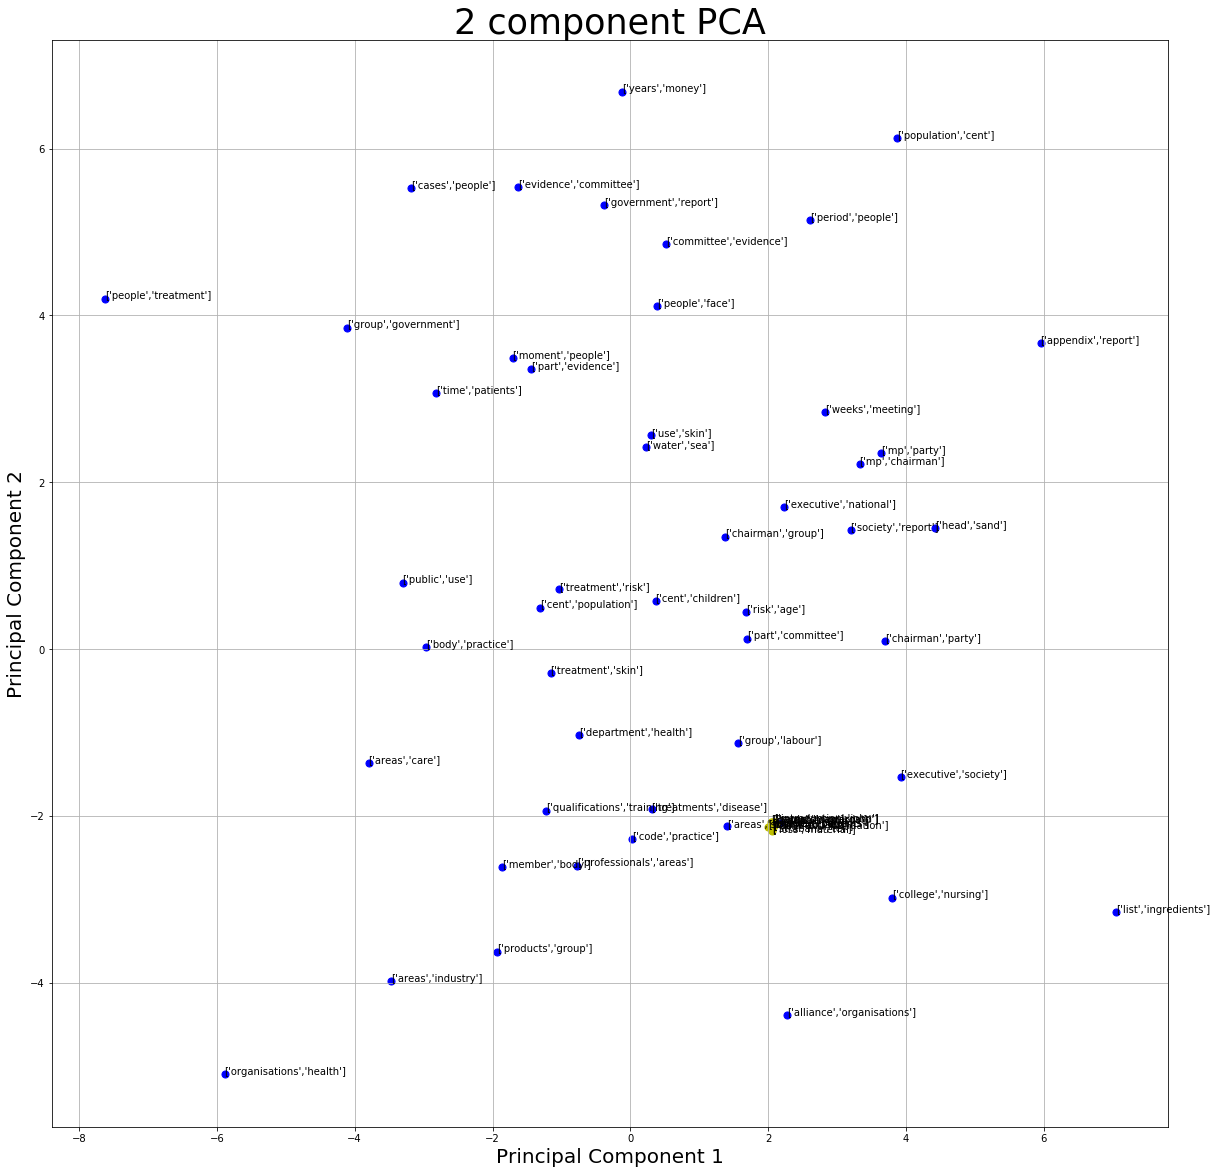

In [7]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize = 20)
ax.set_ylabel('Principal Component 2', fontsize = 20)
ax.set_title('2 component PCA', fontsize = 35)

targets = y

#colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']
randomness = np.random.randint(0,len(y),100)

for r in range(50):
 
    target = targets[r]
    pair = target[0]
    indicesToKeep = finalDf['0'] == pair
    
    
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
           , finalDf.loc[indicesToKeep, 'principal component 2']
           , c = 'b'
           , s = 50)
    
    
    ax.annotate( pair, (finalDf.loc[indicesToKeep, 'principal component 1']
           , finalDf.loc[indicesToKeep, 'principal component 2']))


for items in nearestNeighbors:
 
    pair = items[1]
    indicesToKeep = finalDf['0'] == pair
    
    
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
           , finalDf.loc[indicesToKeep, 'principal component 2']
           , c = 'y'
           , s = 50)
    
    ax.annotate( pair, (finalDf.loc[indicesToKeep, 'principal component 1']
           , finalDf.loc[indicesToKeep, 'principal component 2']))


    
#ax.legend(targets)
ax.grid()

#pca.explained_variance_ratio_ 